In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
df = pd.read_csv("owid-covid-data.csv")
#this data is for anslysis
death = pd.read_csv('time_series_covid_19_deaths.csv')
recovered = pd.read_csv('time_series_covid_19_recovered.csv')
positive = pd.read_csv('time_series_covid_19_confirmed.csv')

In [3]:
df = pd.read_csv("covid_19_data.csv")
df #this data is also for anslysis

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [6]:
#total countrues
print("The Total numbers of countries affected are: {}".format(df['Country/Region'].unique().shape[0]))

The Total numbers of countries affected are: 229


### Death by graphs in each affected contries

In [59]:
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import  geopy

In [92]:
'''
death[death['Country/Region'] == 'Afghanistan'].iloc[:,4:].values
lat = death[death['Country/Region'] == 'Afghanistan']['Lat'].values[0]
long = death[death['Country/Region'] == 'Afghanistan']['Long'].values[0]
total_death = death[death['Country/Region'] == 'Afghanistan'].iloc[:,4:].values.sum()
radius = death.iloc[:,4:].sum().sum()/total_death
'''

466.3833777977058

In [178]:
deaths = death.dropna(subset=['Lat','Long'])
n = deaths['Lat'].unique()
data = {'long':[],'lat':[],'Country/Region':[],'deaths':[]}
for lat in n:
    temp = death[death['Lat'] == lat]
    data['long'].append(temp['Long'].values[0])
    data['lat'].append(lat)
    if pd.isnull(temp['Province/State'].values[0]) == False:
        data['Country/Region'].append(temp['Province/State'].values[0])
    elif pd.isnull(temp['Province/State'].values[0]) == True:
        data['Country/Region'].append(temp['Country/Region'].values[0])
    data['deaths'].append(temp.iloc[:,4:].values.sum())

In [180]:
data = pd.DataFrame(data)
data = data.sort_values('deaths')
data

,long,lat,Country/Region,deaths
0,67.709953,33.939110,Afghanistan,669075
1,20.168300,41.153300,Albania,375955
2,1.659600,28.033900,Algeria,834464
3,1.521800,42.506300,Andorra,32100
4,17.873900,-11.202700,Angola,116489
...,...,...,...,...
265,108.277199,14.058324,Vietnam,10220
266,35.233200,31.952200,West Bank and Gaza,440368
267,48.516388,15.552727,Yemen,237613
268,27.849332,-13.133897,Zambia,205990


In [206]:
radius = 1 
last_count = 0
world_map = folium.Map()
marker_cluster = MarkerCluster().add_to(world_map)
for x in range(data.shape[0]):
    temp = data.iloc[x,:]
    lat = temp['lat']
    long = temp['long']
    CountryOrState = temp['Country/Region']
    radius += 0.5
    last_count = temp['deaths']
    folium.CircleMarker(location = [lat,long],
                       radius = radius,
                       popup = f"{CountryOrState} and <br> {temp['deaths']} deaths",
                       fill = True).add_to(marker_cluster)

In [207]:
world_map

### Locations of all recovered cases 

In [305]:
recover = recovered.dropna(subset=['Lat','Long'])
n = recover['Lat'].unique()
data = {'long':[],'lat':[],'Country/Region':[],'recovered':[]}
for lat in n:
    temp = recover[recover['Lat'] == lat]
    data['long'].append(temp['Long'].values[0])
    data['lat'].append(lat)
    if pd.isnull(temp['Province/State'].values[0]) == False:
        data['Country/Region'].append(temp['Province/State'].values[0])
    elif pd.isnull(temp['Province/State'].values[0]) == True:
        data['Country/Region'].append(temp['Country/Region'].values[0])
    data['recovered'].append(temp.iloc[:,4:].values.sum())
data = pd.DataFrame(data)
data = data.sort_values('recovered')
data

,long,lat,Country/Region,recovered
180,5.291300,52.132600,Netherlands,0
143,-168.734000,-3.370400,Kiribati,0
222,18.643501,60.128161,Sweden,0
167,150.550800,7.425600,Micronesia,121
252,166.959200,-15.376700,Vanuatu,252
...,...,...,...,...
234,-100.000000,40.000000,US,496971828
233,35.243300,38.963700,Turkey,564170558
198,105.318756,61.524010,Russia,790705715
30,-51.925300,-14.235000,Brazil,2313543725


In [307]:
radius = 1 
last_count = 0
world_map = folium.Map()
marker_cluster = MarkerCluster().add_to(world_map)
for x in range(data.shape[0]):
    temp = data.iloc[x,:]
    lat = temp['lat']
    long = temp['long']
    CountryOrState = temp['Country/Region']
    radius += 0.5
    last_count = temp['recovered']
    folium.CircleMarker(location = [lat,long],
                       radius = radius,
                       popup = f"{CountryOrState} and <br> {temp['recovered']} recovered",
                       fill = True).add_to(marker_cluster)
world_map

### Locations of all positive cases 

In [312]:
confirm = positive.dropna(subset=['Lat','Long'])
n = confirm['Lat'].unique()
data = {'long':[],'lat':[],'Country/Region':[],'confirmed':[]}
for lat in n:
    temp = confirm[confirm['Lat'] == lat]
    data['long'].append(temp['Long'].values[0])
    data['lat'].append(lat)
    if pd.isnull(temp['Province/State'].values[0]) == False:
        data['Country/Region'].append(temp['Province/State'].values[0])
    elif pd.isnull(temp['Province/State'].values[0]) == True:
        data['Country/Region'].append(temp['Country/Region'].values[0])
    data['confirmed'].append(temp.iloc[:,4:].values.sum())
data = pd.DataFrame(data)
data = data.sort_values('confirmed')
radius = 1 
last_count = 0
world_map = folium.Map()
marker_cluster = MarkerCluster().add_to(world_map)
for x in range(data.shape[0]):
    temp = data.iloc[x,:]
    lat = temp['lat']
    long = temp['long']
    CountryOrState = temp['Country/Region']
    radius += 0.5
    last_count = temp['confirmed']
    folium.CircleMarker(location = [lat,long],
                       radius = radius,
                       popup = f"{CountryOrState} and <br> {temp['confirmed']} confirmed",
                       fill = True).add_to(marker_cluster)
world_map

### Total Deaths By Month

c:\users\kk\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Covid Deaths from 1/2020 - 12/2020'}>

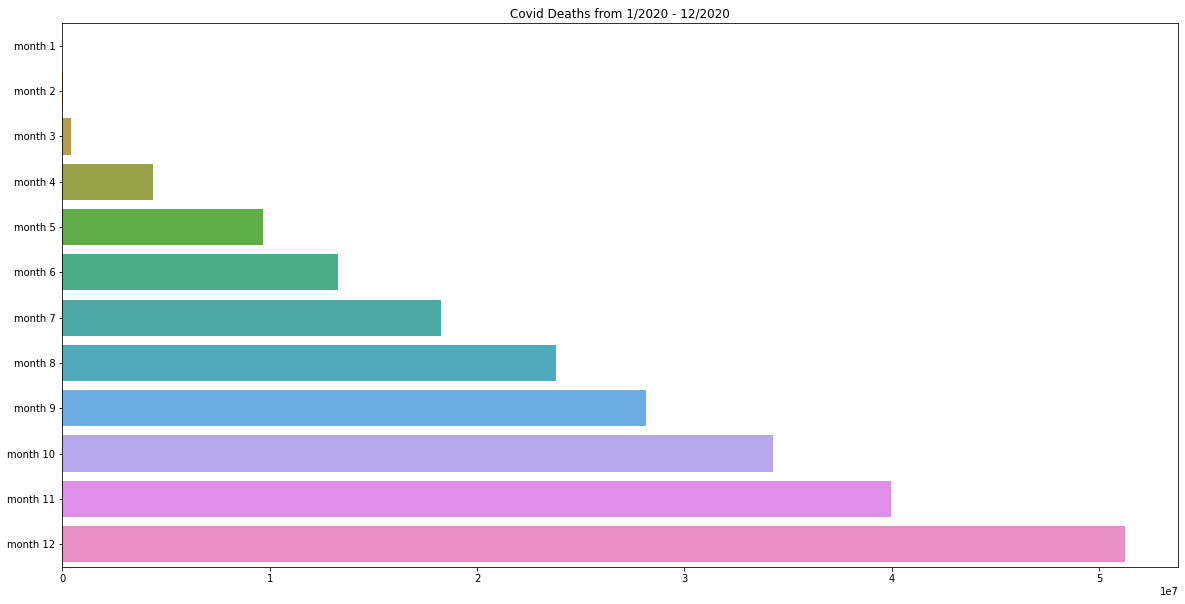

In [314]:
deaths = death.dropna(subset=['Lat','Long'])
transposed = deaths.iloc[:,4:].T
transposed.columns = deaths['Country/Region']
dates = [['1/22/20','1/31/20'], ['2/1/20','2/28/20'],['3/1/20','3/31/20'],['4/1/20','4/30/20'],
  ['5/1/20','5/31/20'],['6/1/20','6/30/20'],['7/1/20','7/31/20'],['8/1/20','8/31/20'],
  ['9/1/20','9/30/20'],['10/1/20','10/31/20'],['11/1/20','11/30/20'],['12/1/20','12/31/20']]
total_deaths = []
for i in dates:
    td = transposed[i[0]:i[1]].sum().sum()
    total_deaths.append(td)
    
plt.figure(figsize = (20,10))

plt.title("Covid Deaths from 1/2020 - 12/2020")
sns.barplot(total_deaths,[f'month {i}' for i in range(1,13)])

### Total Recovered by Months

c:\users\kk\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


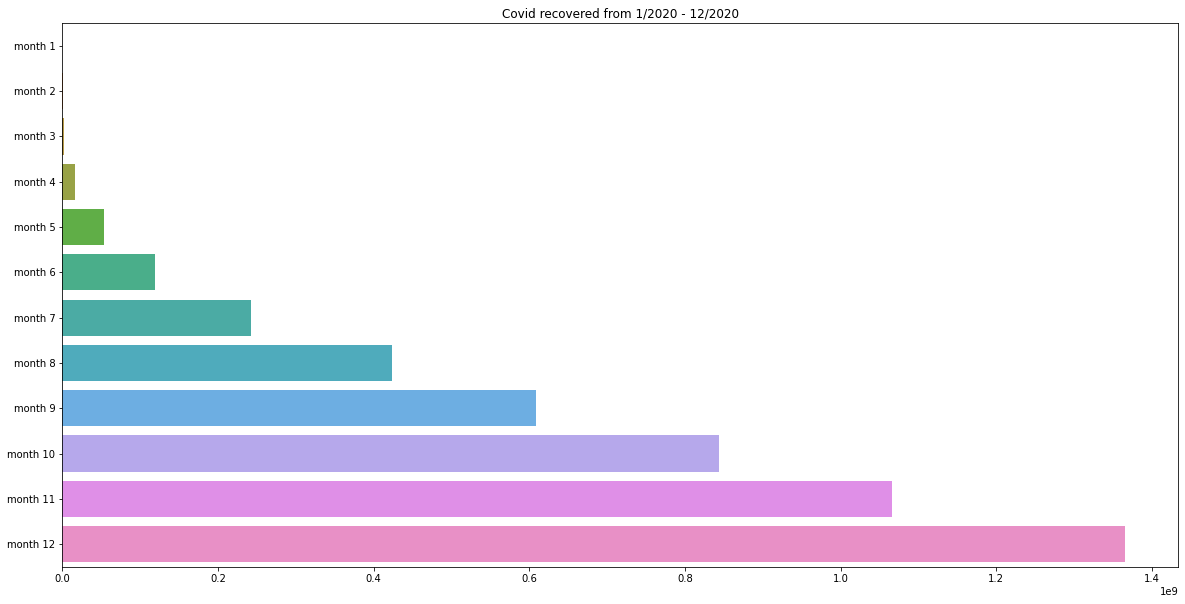

In [316]:
deaths = recovered.dropna(subset=['Lat','Long'])
transposed = deaths.iloc[:,4:].T
transposed.columns = deaths['Country/Region']
dates = [['1/22/20','1/31/20'], ['2/1/20','2/28/20'],['3/1/20','3/31/20'],['4/1/20','4/30/20'],
  ['5/1/20','5/31/20'],['6/1/20','6/30/20'],['7/1/20','7/31/20'],['8/1/20','8/31/20'],
  ['9/1/20','9/30/20'],['10/1/20','10/31/20'],['11/1/20','11/30/20'],['12/1/20','12/31/20']]
total_deaths = []
for i in dates:
    td = transposed[i[0]:i[1]].sum().sum()
    total_deaths.append(td)
    
plt.figure(figsize = (20,10))

plt.title("Covid recovered from 1/2020 - 12/2020")
sns.barplot(total_deaths,[f'month {i}' for i in range(1,13)]);

### Total Positives by month

c:\users\kk\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


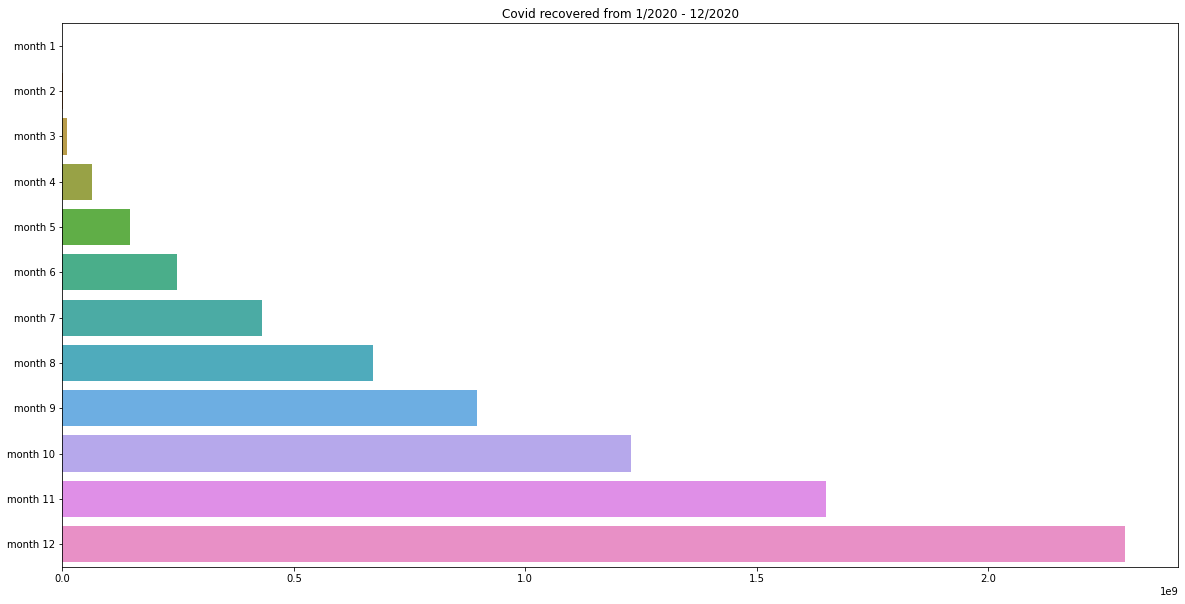

In [317]:
deaths = positive.dropna(subset=['Lat','Long'])
transposed = deaths.iloc[:,4:].T
transposed.columns = deaths['Country/Region']
dates = [['1/22/20','1/31/20'], ['2/1/20','2/28/20'],['3/1/20','3/31/20'],['4/1/20','4/30/20'],
  ['5/1/20','5/31/20'],['6/1/20','6/30/20'],['7/1/20','7/31/20'],['8/1/20','8/31/20'],
  ['9/1/20','9/30/20'],['10/1/20','10/31/20'],['11/1/20','11/30/20'],['12/1/20','12/31/20']]
total_deaths = []
for i in dates:
    td = transposed[i[0]:i[1]].sum().sum()
    total_deaths.append(td)
    
plt.figure(figsize = (20,10))

plt.title("Covid recovered from 1/2020 - 12/2020")
sns.barplot(total_deaths,[f'month {i}' for i in range(1,13)]);

In [318]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2/24/2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2/27/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2/28/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93101,ZWE,Africa,Zimbabwe,5/29/2021,38933.0,15.0,36.286,1594.0,2.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93102,ZWE,Africa,Zimbabwe,5/30/2021,38944.0,11.0,37.429,1594.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93103,ZWE,Africa,Zimbabwe,5/31/2021,38961.0,17.0,37.857,1594.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93104,ZWE,Africa,Zimbabwe,6/1/2021,38998.0,37.0,41.714,1599.0,5.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
